## Observations and Insights 
### (1) The average tumor volume was observed to be lowest under the Capomulin and Ramicane regimens.
### (2) Mouse s185, taking Capomulin, saw pronounced decrease in tumor volume over time.
### (3) There is a strong positive correlation between mouse weight and average tumor size.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data = pd.merge(mouse_metadata,study_results)

# Display the data table for preview
all_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = len(mouse_metadata["Mouse ID"])
mouse_count

249

In [3]:
# Getting the duplicate entries by mouse ID number that show up for Mouse ID and Timepoint. 
mouse_grouped = all_data.groupby(["Mouse ID", "Timepoint"]).count()
mouse_grouped

duplicate=mouse_grouped.loc[mouse_grouped["Drug Regimen"]>1]
duplicate
#all_data.duplicated(subset=['Mouse ID','Timepoint'])
#duplicates = all_data.loc[all_data.duplicated(subset=['Mouse ID','Timepoint'])==True]
#duplicates
    


Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = all_data.loc[all_data["Mouse ID"] != "g989"]
cleaned_data.head(11)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_almostcount = cleaned_data["Mouse ID"].unique()
cleaned_mouse_count = len(mouse_almostcount)
cleaned_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
data_grouped = cleaned_data.groupby(["Drug Regimen"])
volume_mean = data_grouped.mean()["Tumor Volume (mm3)"]
volume_median = data_grouped.median()["Tumor Volume (mm3)"]
volume_variance = data_grouped.var()["Tumor Volume (mm3)"]
volume_stddev = data_grouped.std()["Tumor Volume (mm3)"]
volume_sem = data_grouped.sem()["Tumor Volume (mm3)"]
summary_df=pd.DataFrame({"Mean":volume_mean,"Median":volume_median,"Variance":volume_variance,
                         "Standard Deviation":volume_stddev,"SEM":volume_sem})
summary_df=summary_df.style.set_caption("Tumor Volume (mm3)")
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
##I looked up the DataFrame.agg() method in the pandas docs
summary_df2 = cleaned_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

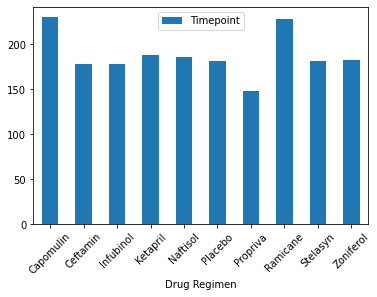

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
data_by_drug = cleaned_data.groupby("Drug Regimen")
data_time_counted = data_by_drug.count()
data_time_counted.plot.bar(y="Timepoint", rot=45)



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

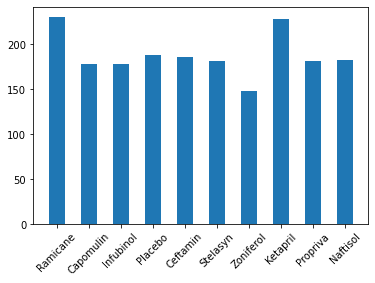

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = [drug for drug in cleaned_data["Drug Regimen"].unique()]
x_axis = np.arange(len(drugs))
plt.bar(x=x_axis,height=data_time_counted["Timepoint"], tick_label = drugs, width=0.5)
plt.xticks(rotation=45)

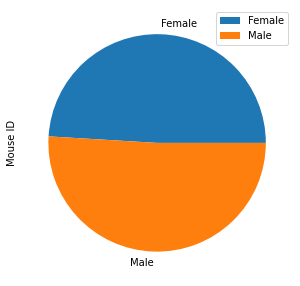

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data_by_sex = cleaned_data.groupby("Sex")
data_sex_counted = data_by_sex.count()
data_sex_counted.plot.pie(y="Mouse ID", figsize=(5,5))


([<matplotlib.patches.Wedge at 0x16d33d44f88>,
 [Text(0.0413525176032695, 1.374378029978605, 'Female'),
  Text(-0.04135251760326937, -1.374378029978605, 'Male')])

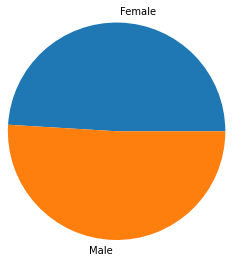

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = ["Female", "Male"]
plt.pie(x=data_sex_counted["Mouse ID"],labels=sexes,radius=1.25)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_times = cleaned_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = cleaned_data.merge(last_times,how="left", on="Mouse ID")
merged_data=merged_data.loc[merged_data["Timepoint_x"] == merged_data["Timepoint_y"]]
print(merged_data.iloc[1,6])
merged_data


23.34359787


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1849,z435,Propriva,Female,12,26,10,48.710661,0,10
1859,z581,Infubinol,Female,24,25,45,62.754451,3,45
1869,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [14]:
# Put treatments into a list for a for loop (and later for plot labels)
four_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
last_tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in four_drugs:
    tumor_vol_drug = []
    # Locate the rows which contain mice on each drug and get the tumor volumes
    for i in np.arange(0,len(merged_data["Mouse ID"])):
        if merged_data.iloc[i,1] == drug:
            #print("got here")
            tumor_vol = merged_data.iloc[i,6]
            tumor_vol_drug.append(tumor_vol)
    # add subset 
    last_tumor_vol.append(tumor_vol_drug)
last_tumor_vol[0]



[23.34359787,
 28.48403281,
 28.43096411,
 30.48598484,
 31.02392294,
 31.896238399999998,
 32.37735684,
 33.32909778,
 34.45529799,
 37.31184577,
 36.04104736,
 37.07402422,
 38.84687569,
 38.93963263,
 38.98287774,
 38.75326548,
 38.125164399999996,
 39.95234669,
 40.65812366,
 40.1592203,
 40.72857787,
 41.48300765,
 41.58152074,
 47.68596303,
 46.53920617]

In [15]:
# Determine outliers using upper and lower bounds
last_tumor_cap_df = pd.DataFrame({"Last Tumor Voume (Capomulin)(mm3)":last_tumor_vol[0]})
quartiles_cap = last_tumor_cap_df.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap.loc[0.25]
upperq_cap = quartiles_cap.loc[0.75]
iqr_cap = upperq_cap-lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")
volumes_cap = list(last_tumor_cap_df["Last Tumor Voume (Capomulin)(mm3)"])
volumes_cap.sort()
volumes_cap #all Capomulin datapoints are within bounds


Values below Last Tumor Voume (Capomulin)(mm3)    20.704562
dtype: float64 could be outliers.
Values above Last Tumor Voume (Capomulin)(mm3)    51.832015
dtype: float64 could be outliers.


[23.34359787,
 28.43096411,
 28.48403281,
 30.48598484,
 31.02392294,
 31.896238399999998,
 32.37735684,
 33.32909778,
 34.45529799,
 36.04104736,
 37.07402422,
 37.31184577,
 38.125164399999996,
 38.75326548,
 38.84687569,
 38.93963263,
 38.98287774,
 39.95234669,
 40.1592203,
 40.65812366,
 40.72857787,
 41.48300765,
 41.58152074,
 46.53920617,
 47.68596303]

In [16]:
last_tumor_ram_df = pd.DataFrame({"Last Tumor Voume (Ramicane)(mm3)":last_tumor_vol[1]})
quartiles_ram = last_tumor_ram_df.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram.loc[0.25]
upperq_ram = quartiles_ram.loc[0.75]
iqr_ram = upperq_ram - lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
print(f"Values below {lower_bound_ram} could be outliers.")
print(f"Values above {upper_bound_ram} could be outliers.")
volumes_ram = list(last_tumor_ram_df["Last Tumor Voume (Ramicane)(mm3)"])
volumes_ram.sort()
volumes_ram #all Ramicane datapoints are within bounds


Values below Last Tumor Voume (Ramicane)(mm3)    17.912664
dtype: float64 could be outliers.
Values above Last Tumor Voume (Ramicane)(mm3)    54.306811
dtype: float64 could be outliers.


[22.05012627,
 29.12847181,
 30.27623175,
 30.56462509,
 30.63869575,
 31.09533505,
 31.56046955,
 32.97852192,
 33.39765251,
 33.56240217,
 36.13485243,
 36.37451039,
 36.56165229,
 37.22565033,
 37.31123552,
 38.34200823,
 38.407618299999996,
 38.81036633,
 40.65900627,
 40.66771292,
 43.04754260000001,
 43.16637266,
 43.41938077,
 44.18345092,
 45.22086888]

In [17]:
last_tumor_inf_df = pd.DataFrame({"Last Tumor Voume (Infubinol)(mm3)":last_tumor_vol[2]})
quartiles_inf = last_tumor_inf_df.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf.loc[0.25]
upperq_inf = quartiles_inf.loc[0.75]
iqr_inf = upperq_inf - lowerq_inf
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)
print(f"Values below {lower_bound_inf} could be outliers.")
print(f"Values above {upper_bound_inf} could be outliers.")
volumes_inf = list(last_tumor_inf_df["Last Tumor Voume (Infubinol)(mm3)"])
volumes_inf.sort()
volumes_inf #one Infubiol datapoint is outside bounds
volumes_inf.remove(36.321345799999996)
volumes_inf #outlier has been removed

Values below Last Tumor Voume (Infubinol)(mm3)    36.832905
dtype: float64 could be outliers.
Values above Last Tumor Voume (Infubinol)(mm3)    82.741446
dtype: float64 could be outliers.


[45.69933088,
 46.25011212,
 47.01036401,
 50.00513807,
 51.54243058,
 54.04860769,
 54.65654872,
 55.62942846,
 55.65068132,
 57.03186187,
 58.26844248,
 60.16518046,
 60.91876652,
 60.96971133,
 62.11727887,
 62.43540402,
 62.75445141,
 65.52574285,
 66.08306589,
 66.19691151,
 67.28962147,
 67.68556862,
 67.97341878,
 72.2267309]

In [18]:
last_tumor_cef_df = pd.DataFrame({"Last Tumor Voume (Ceftamin)(mm3)":last_tumor_vol[3]})
quartiles_cef = last_tumor_cef_df.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef.loc[0.25]
upperq_cef = quartiles_cef.loc[0.75]
iqr_cef = upperq_cef - lowerq_cef
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)
print(f"Values below {lower_bound_cef} could be outliers.")
print(f"Values above {upper_bound_cef} could be outliers.")
volumes_cef = list(last_tumor_cef_df["Last Tumor Voume (Ceftamin)(mm3)"])
volumes_cef.sort()
volumes_cef #all Ceftamin datapoints are within bounds

Values below Last Tumor Voume (Ceftamin)(mm3)    25.35545
dtype: float64 could be outliers.
Values above Last Tumor Voume (Ceftamin)(mm3)    87.666458
dtype: float64 could be outliers.


[45.0,
 45.0,
 45.0,
 45.0,
 46.78453491,
 47.784681799999994,
 48.72207785,
 52.92534846,
 55.74282869,
 56.05774909,
 57.91838132,
 59.74190064,
 59.85195552,
 61.38666032,
 61.43389223,
 61.84902336,
 62.99935619,
 64.19234114,
 64.29983003,
 64.63494887,
 64.72983655,
 67.52748237,
 67.74866174,
 68.59474498,
 68.92318457]

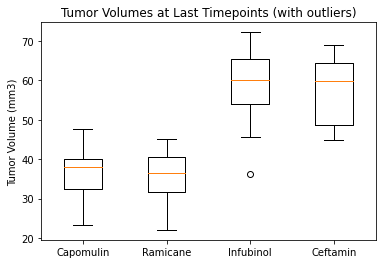

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes at Last Timepoints (with outliers)')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(last_tumor_vol)
plt.xticks([1,2,3,4],four_drugs)
plt.show()


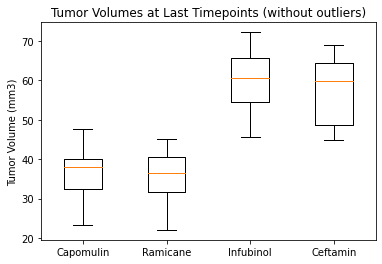

In [20]:
cleaned_last_tumor_vol = [volumes_cap,volumes_ram,volumes_inf,volumes_cef]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes at Last Timepoints (without outliers)')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(cleaned_last_tumor_vol)
plt.xticks([1,2,3,4],four_drugs)
plt.show()

## Line and Scatter Plots

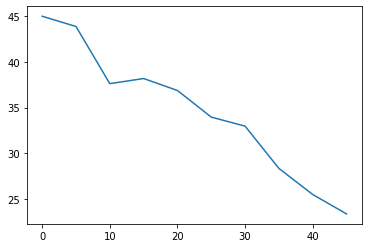

In [21]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
mouse_s185 = cleaned_data.loc[cleaned_data["Mouse ID"] == "s185"]
plt.plot(mouse_s185["Timepoint"], mouse_s185["Tumor Volume (mm3)"])


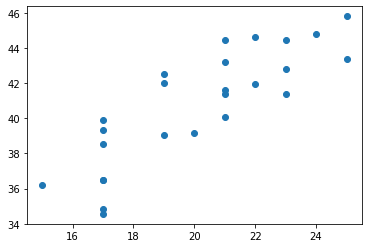

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_regimen = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]
avg_tumor_vol_by_mouse = capo_regimen.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()

avg_tumor_vol_by_mouse_df = pd.DataFrame(avg_tumor_vol_by_mouse)
avg_tumor_vol_by_mouse_df = avg_tumor_vol_by_mouse_df.reset_index()
avg_tumor_vol_by_mouse_df

x_axis = avg_tumor_vol_by_mouse_df["Weight (g)"]
data = avg_tumor_vol_by_mouse_df["Tumor Volume (mm3)"]
plt.scatter(x_axis, data) 
            
            #marker="o", facecolors="red", edgecolors="black",
            #s=x_axis, alpha=0.75)

## Correlation and Regression

The correlation between both factors is 0.84


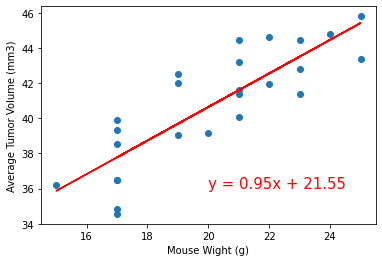

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_tumor_vol_by_mouse_df["Weight (g)"],avg_tumor_vol_by_mouse_df["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = avg_tumor_vol_by_mouse_df["Weight (g)"]
y_values = avg_tumor_vol_by_mouse_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,36),fontsize=15,color="red") 
plt.xlabel('Mouse Wight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()